# Modeling Diffusion from Inner Stream to Outer Stream

We again look at video `v360_co2_8987_017_050_0200_94_295_04_7.mp4` from August 29, 2020, this time modeling the diffusion of CO2 from the polyol-CO2 inner stream to the pure-polyol outer stream. 

In [81]:
# adds custom libraries to path
import sys
sys.path.append('../libs/')

# imports standard libraries
import numpy as np
import matplotlib.pyplot as plt

# imports custom libraries
import polyco2
import diffn
import flow

from importlib import reload
reload(polyco2)
reload(diffn)


# flow parameters
# viscosity of inner and outer streams [Pa.s]
eta_i = 0.25 # rough estimate of VORANOL 360 + CO2 dissolved so should be lower
eta_o = 4.815
# length of observation capillary [m]
L = 10E-2
# outer stream radius [m]
R_o = 150E-6
Q_o = 200/60E9 # outer stream flow rate, input to ISCO 260 D [m^3/s]
Q_i = 50/60E9 # inner stream flow rate, input to ISCO 100 DM [m^3/s]
p_s = 80E5 # saturation pressure of CO2 in VORANOL 360 [Pa]

# grid parameters
r_min = 0 # [m]
r_max = 150E-6 # outer radius [m]
N = 100 # number of grid spacings 
# computes mesh [m]
r_arr = np.linspace(r_min, r_max, N+1)

# diffusion model parameters 
dt = 10E-3 # time step [s]
t_f = 400E-3 # final time [s]
dcdt_fn = diffn.calc_dcdt_cyl
bc_specs_list = [(diffn.neumann, 0, 1, 0, r_arr), (diffn.dirichlet, -1, 0)]
dc_c_s_frac = 0.01 # step size in concentration for estimating dD/dc as a fraction of saturation concentration

# load data (interfacial tension, solubility, and diffusivity) for polyols? we don't have data for VORANOL 360...use 1k3f
polyol_data_file = '1k3f_22c.csv'

# CONVERSIONS
s_2_ms = 1E3

### Set Initial Concentration Profile

We assume saturation in the inner stream up to the inner radius and no CO2 in the outer stream.

In [82]:
# computes properties of flow in observation capillary
_, R_i, _ = flow.get_dp_R_i_v_max(eta_i, eta_o, L, Q_i, Q_o, R_o, SI=True)

# creates initial concentration profile [kg CO2 / m^3 polyol-CO2]
c_0 = np.zeros([N+1])
c_s = polyco2.calc_c_s(p_s, polyol_data_file)
c_0[r_arr <= R_i] = c_s
dc = c_s*dc_c_s_frac

### Compute Diffusion of CO2 from Inner to Outer Stream

In [ ]:
reload(polyco2)
reload(diffn)

t, c = diffn.go(dt, t_f, r_arr, list(c_0), dcdt_fn, bc_specs_list, dc, polyol_data_file)

### Plot Results

NameError: name 't' is not defined

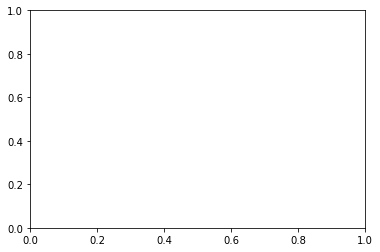

In [59]:
# initializes plot
fig = plt.figure()
ax = fig.add_subplot(111)

# plot desired concentration profiles
n_plot = 3
n_steps = len(t)
skip = int(n_steps / n_plot)

for i in range(0, n_steps, skip):
    ax.plot(r_arr, c[i], label='t = {0:.1f} ms'.format(t[i]*s_2_ms))

In [63]:
[a for a in np.array([1,2,3])]

[1, 2, 3]